---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_annot.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a> -->

## 📈🔖Annotating visualisations.

In [12]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import matplotlib.pyplot as plt
# output directory
output_dir_path="tests/output/plot/"
## create
from os import makedirs
makedirs(output_dir_path,exist_ok=True)

### Example of annotated scatter plot

In [2]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


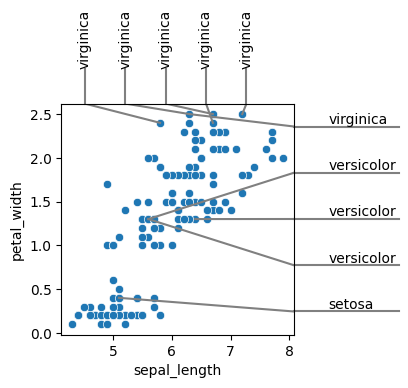

In [3]:
# plot
_,ax=plt.subplots(figsize=[3,3])
ax=sns.scatterplot(data=df1,x='sepal_length',y='petal_width',ax=ax)
from roux.viz.annot import annot_side
ax=annot_side(ax=ax,
           df1=df1.sample(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1.3)
ax=annot_side(ax=ax,
           df1=df1.sort_values('petal_width',ascending=False).head(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1,
           loc='top',)
plt.savefig('tests/output/plot/scatter_annotated.png')

#### Documentation
[`roux.viz.annot`](https://github.com/rraadd88/roux#module-roux.viz.annot)
[`roux.viz.scatter`](https://github.com/rraadd88/roux#module-roux.viz.scatter)

### Example of annotated histogram

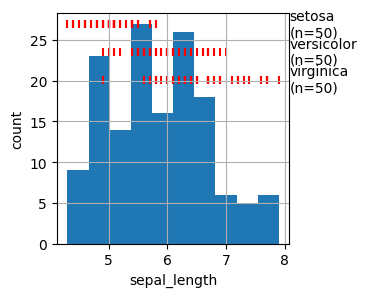

In [4]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

# plot
_,ax=plt.subplots(figsize=[3,3])
from roux.viz.dist import hist_annot
ax=hist_annot(
    df1,colx='sepal_length',colssubsets=['species'],bins=10,
    params_scatter=dict(marker='|',alpha=1),
    ax=ax)
plt.savefig('tests/output/plot/hist_annotated.png')

#### Documentation
[`roux.viz.dist`](https://github.com/rraadd88/roux#module-roux.viz.dist)

### Example of annotated heatmap

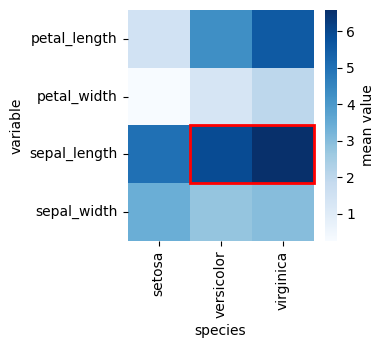

In [5]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1=(df1
    .set_index('species')
    .melt(ignore_index=False)
    .reset_index()
    .pivot_table(index='variable',columns='species',values='value',aggfunc='mean'))

# plot
_,ax=plt.subplots(figsize=[3,3])
ax=sns.heatmap(df1,
    cmap='Blues',
    cbar_kws=dict(label='mean value'),
    ax=ax,)
from roux.viz.annot import show_box
ax=show_box(ax=ax,xy=[1,2],width=2,height=1,ec='red',lw=2)
plt.savefig('tests/output/plot/heatmap_annotated.png')

#### Documentation
[`roux.viz.heatmap`](https://github.com/rraadd88/roux#module-roux.viz.heatmap)

### Example of annotated distributions

#### Horizontal

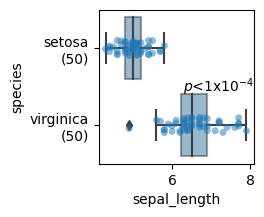

In [6]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1=df1.loc[df1['species'].isin(['setosa','virginica']),:]
df1['id']=range(len(df1))

# plot
from roux.viz.dist import plot_dists
ax=plot_dists(df1,x='sepal_length',y='species',colindex='id',kind=['box','strip'])
plt.savefig('tests/output/plot/dists_annotated.png')

#### Vertical

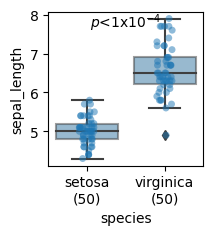

In [7]:
# plot
from roux.viz.dist import plot_dists
ax=plot_dists(df1,x='species',y='sepal_length',colindex='id',kind=['box','strip'])
plt.savefig('tests/output/plot/dists_annotated_vertical.png')

#### Annotated points within distributions

In [8]:
# demo data
df1=df1.assign(**{
    'annotations':lambda df: df.apply(lambda x: 'a' if (x['sepal_length']>5.75 and x['sepal_length']<6) else 'b' if (x['sepal_length']>5.5 and x['sepal_length']<5.75) else None,axis=1),
             })
df1['annotations'].value_counts()

a    5
b    4
Name: annotations, dtype: int64

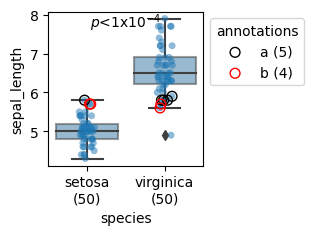

In [9]:
## plot
from roux.viz.dist import plot_dists
ax=plot_dists(
    df1,x='species',y='sepal_length',colindex='id',kind=['box','strip'],
    show_outlines='annotations',
    kws_outlines=dict(
        outline_colors={'a':'k','b':'r'},
        legend=True,
        kws_legend=dict(bbox_to_anchor=[1,1]),
    ),              
)
plt.savefig('tests/output/plot/dists_annotated_outlines.png')

#### Documentation
[`roux.viz.dist`](https://github.com/rraadd88/roux#module-roux.viz.dist)

### Example of annotated barplot

0it [00:00, ?it/s]

INFO:root:Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1
tqdm      : 4.64.1
logging   : 0.5.1.2
sys       : 3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]
pandas    : 1.3.5
scipy     : 1.7.3
re        : 2.2.1
matplotlib: 3.5.1
numpy     : 1.18.1
seaborn   : 0.11.2



INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


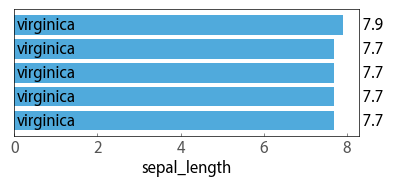

In [10]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

# plot
from roux.viz.bar import plot_barh
ax=plot_barh(df1.sort_values('sepal_length',ascending=False).head(5),
          colx='sepal_length',coly='species',colannnotside='sepal_length')
plt.savefig('tests/output/plot/bar_annotated.png')

#### Documentation
[`roux.viz.bar`](https://github.com/rraadd88/roux#module-roux.viz.bar)